In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nrclex import NRCLex
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load data
df = pd.read_csv("survey.csv")
df = df.dropna(subset=['comments'])

# Basic cleaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(words)

df['cleaned'] = df['comments'].apply(clean_text)


In [4]:
# VADER Sentiment
sid = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return sid.polarity_scores(text)['compound']  # -1 to 1

df['vader_score'] = df['comments'].apply(get_vader_score)

def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['vader_score'].apply(label_sentiment)


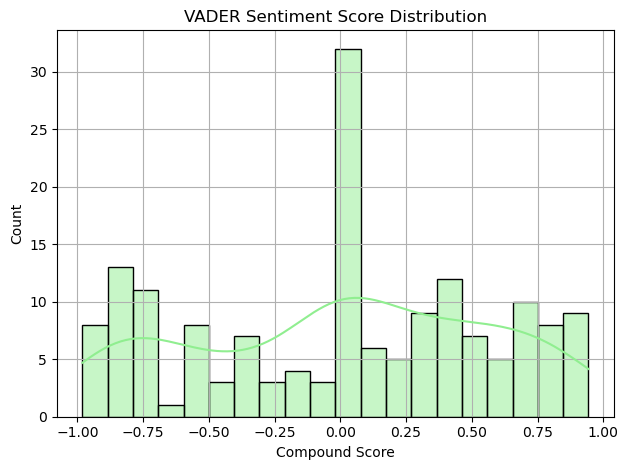

In [5]:
sns.histplot(df['vader_score'], bins=20, kde=True, color='lightgreen')
plt.title("VADER Sentiment Score Distribution")
plt.xlabel("Compound Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_18628\4262634145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='coolwarm')


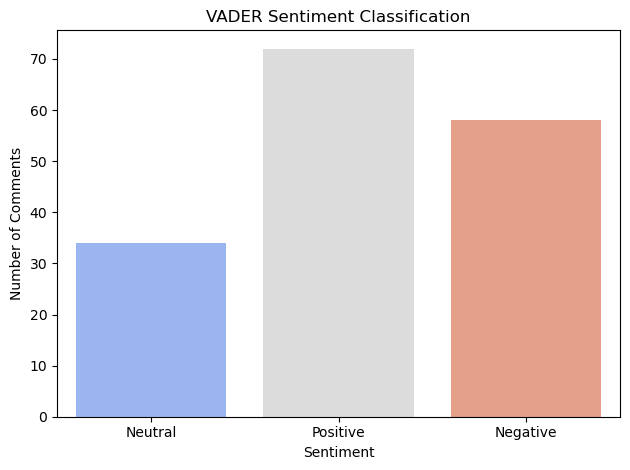

In [6]:
# Bar plot of sentiment categories
sns.countplot(data=df, x='sentiment_label', palette='coolwarm')
plt.title("VADER Sentiment Classification")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()


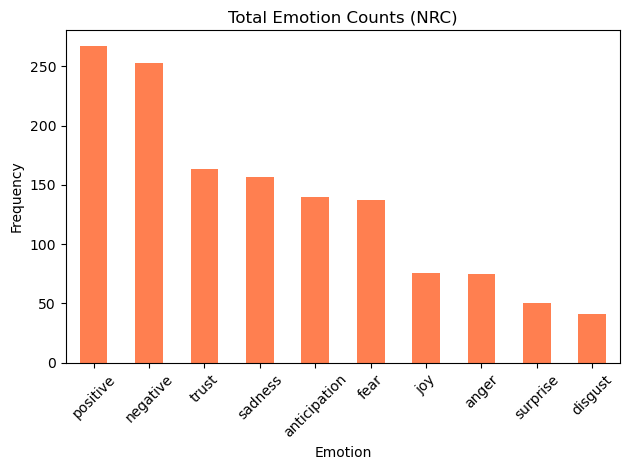

In [7]:
def get_nrc_emotions(text):
    emotion = NRCLex(text)
    return dict(emotion.raw_emotion_scores)

# Apply emotion detection
emotion_data = df['comments'].apply(get_nrc_emotions)

# Convert list of dicts to DataFrame
emotion_df = pd.DataFrame(emotion_data.tolist()).fillna(0)

# Merge with original data
df = pd.concat([df, emotion_df], axis=1)

# Sum of all emotions
emotion_totals = emotion_df.sum().sort_values(ascending=False)

# Plot top emotions
emotion_totals.plot(kind='bar', color='coral')
plt.title("Total Emotion Counts (NRC)")
plt.ylabel("Frequency")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
df['sentiment'] = df['vader_score'].apply(label_sentiment)


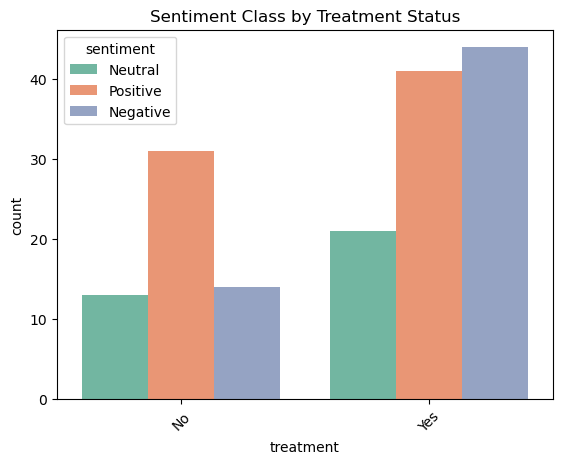

In [34]:
sns.countplot(data=df, x='treatment', hue='sentiment', palette='Set2')
plt.title("Sentiment Class by Treatment Status")
plt.xticks(rotation=45)
plt.show()


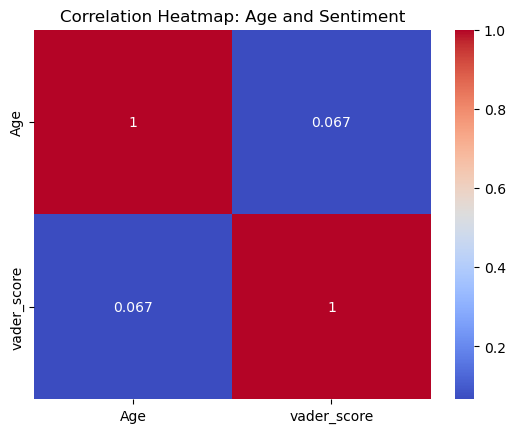

In [35]:
import numpy as np

cor_df = df[['Age', 'vader_score']].dropna()
sns.heatmap(cor_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Age and Sentiment")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_18628\4068552717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='work_interfere', y='vader_score', palette='coolwarm')


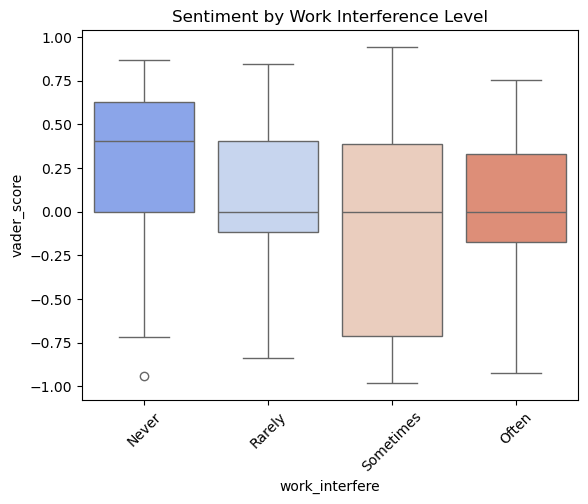

In [36]:
sns.boxplot(data=df, x='work_interfere', y='vader_score', palette='coolwarm')
plt.title("Sentiment by Work Interference Level")
plt.xticks(rotation=45)
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_18628\3796570228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='remote_work', y='vader_score', palette='Set3')


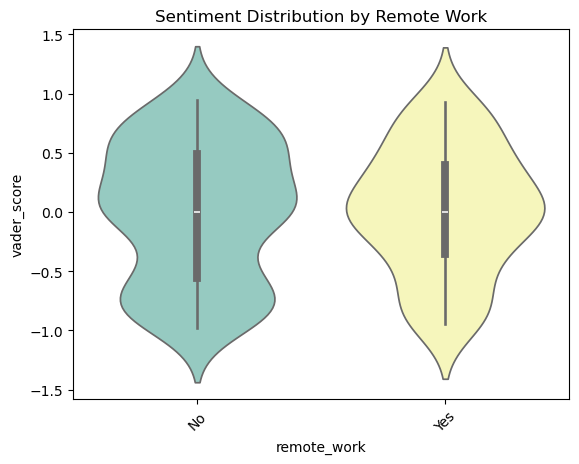

In [37]:
sns.violinplot(data=df, x='remote_work', y='vader_score', palette='Set3')
plt.title("Sentiment Distribution by Remote Work")
plt.xticks(rotation=45)
plt.show()


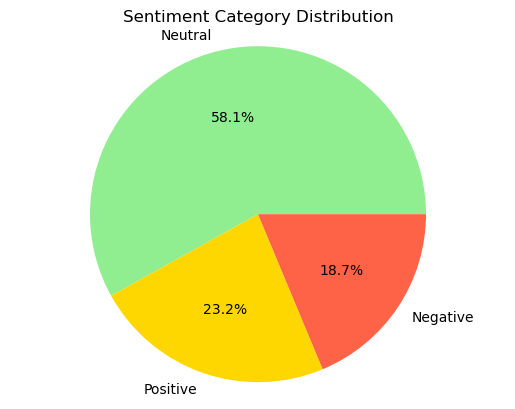

In [38]:
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'gold', 'tomato'])
plt.title("Sentiment Category Distribution")
plt.axis('equal')
plt.show()


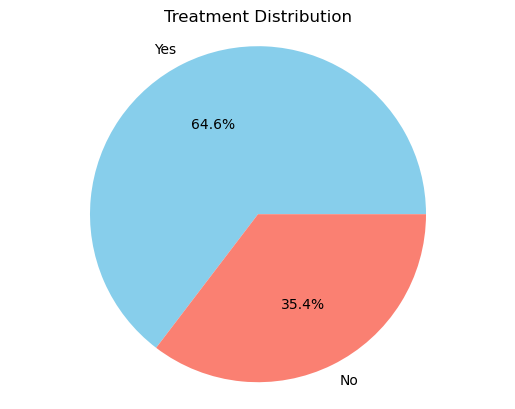

In [39]:
treatment_counts = df['treatment'].value_counts()
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Treatment Distribution")
plt.axis('equal')
plt.show()


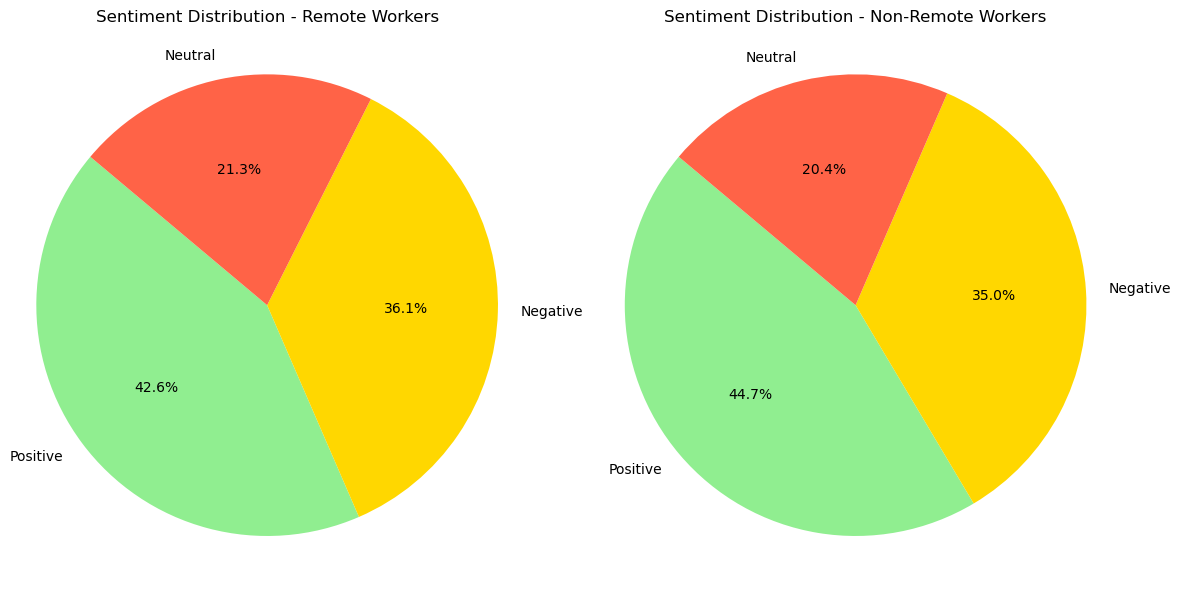

In [41]:
import matplotlib.pyplot as plt


remote_counts = df[df['remote_work'] == 'Yes']['sentiment'].value_counts()
non_remote_counts = df[df['remote_work'] == 'No']['sentiment'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Remote workers
axes[0].pie(remote_counts, labels=remote_counts.index, autopct='%1.1f%%',
            colors=['lightgreen', 'gold', 'tomato'], startangle=140)
axes[0].set_title('Sentiment Distribution - Remote Workers')
axes[0].axis('equal')

# Non-remote workers
axes[1].pie(non_remote_counts, labels=non_remote_counts.index, autopct='%1.1f%%',
            colors=['lightgreen', 'gold', 'tomato'], startangle=140)
axes[1].set_title('Sentiment Distribution - Non-Remote Workers')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


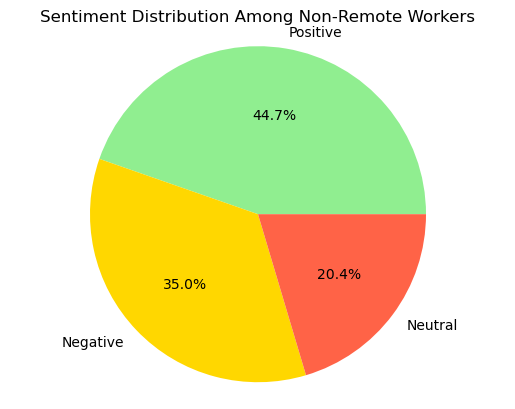

In [19]:
non_remote_sentiment_counts = non_remote['sentiment'].value_counts()

plt.pie(non_remote_sentiment_counts, labels=non_remote_sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'gold', 'tomato'])
plt.title("Sentiment Distribution Among Non-Remote Workers")
plt.axis('equal')
plt.show()


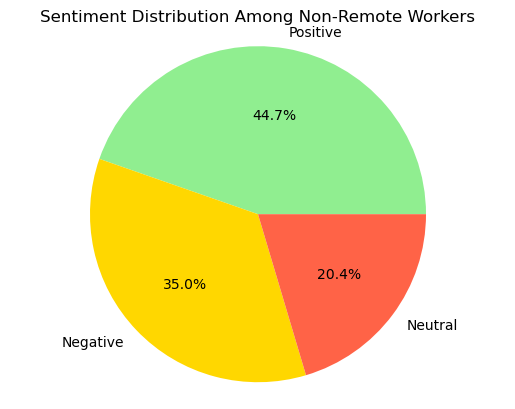

In [22]:
non_remote_sentiment_counts = non_remote['sentiment'].value_counts()

plt.pie(non_remote_sentiment_counts, labels=non_remote_sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'gold', 'tomato'])
plt.title("Sentiment Distribution Among Non-Remote Workers")
plt.axis('equal')
plt.show()


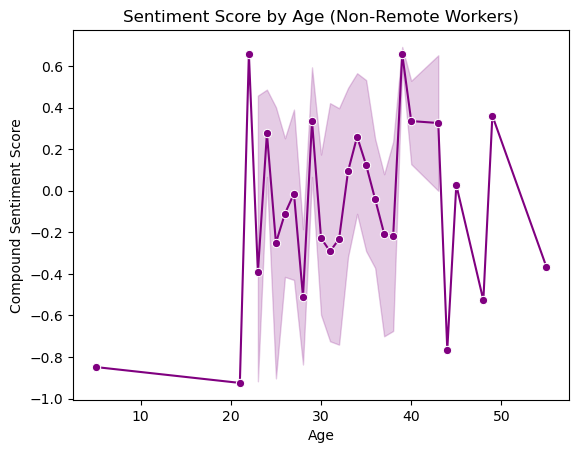

In [23]:
non_remote_sorted = non_remote.sort_values('Age')

sns.lineplot(data=non_remote_sorted, x='Age', y='vader_score', marker='o', color='purple')
plt.title("Sentiment Score by Age (Non-Remote Workers)")
plt.xlabel("Age")
plt.ylabel("Compound Sentiment Score")
plt.show()


In [25]:
#sentiment distribution by treatment

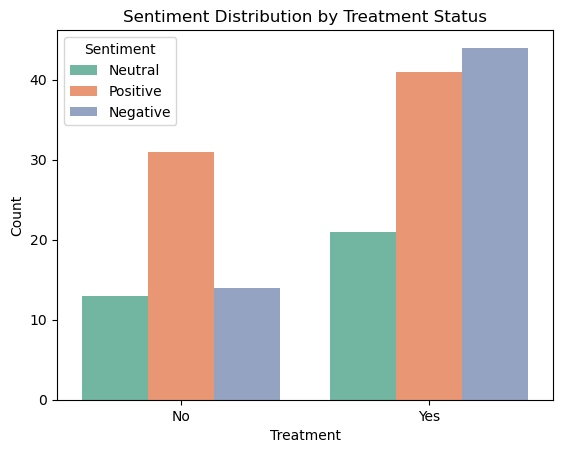

In [26]:
sns.countplot(data=df, x='treatment', hue='sentiment', palette='Set2')
plt.title("Sentiment Distribution by Treatment Status")
plt.xlabel("Treatment")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_18628\3052576242.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_gender_sentiment, x='Gender_clean', y='vader_score', palette='pastel')


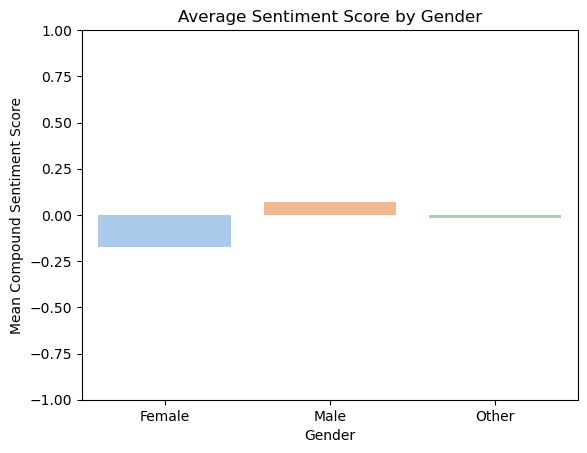

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean gender values (if not already done)
def normalize_gender(gender):
    gender = str(gender).strip().lower()
    if gender in ['male', 'm', 'man', 'male-ish', 'maile']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'femake', 'female (cis)', 'cis female']:
        return 'Female'
    else:
        return 'Other'

df['Gender_clean'] = df['Gender'].apply(normalize_gender)

# Group and plot
avg_gender_sentiment = df.groupby('Gender_clean')['vader_score'].mean().reset_index()

# Bar plot
sns.barplot(data=avg_gender_sentiment, x='Gender_clean', y='vader_score', palette='pastel')
plt.title("Average Sentiment Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Compound Sentiment Score")
plt.ylim(-1, 1)
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_18628\1679523519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='work_interfere', y='vader_score', estimator='mean', palette='coolwarm')


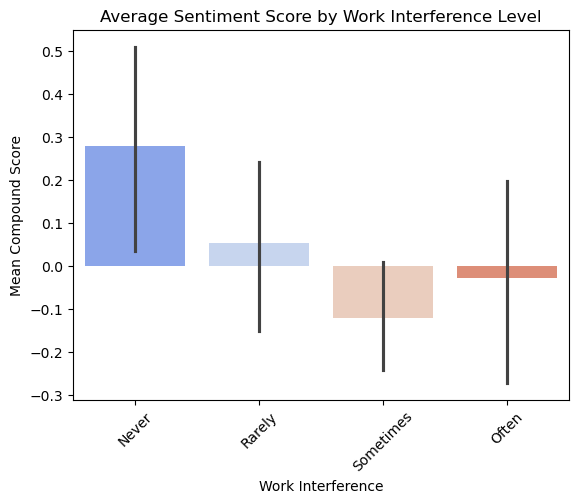

In [29]:
sns.barplot(data=df, x='work_interfere', y='vader_score', estimator='mean', palette='coolwarm')
plt.title("Average Sentiment Score by Work Interference Level")
plt.ylabel("Mean Compound Score")
plt.xlabel("Work Interference")
plt.xticks(rotation=45)
plt.show()


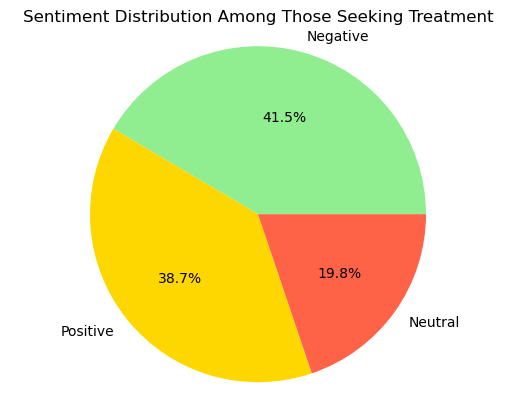

In [30]:
treated = df[df['treatment'] == 'Yes']
treated_sentiment = treated['sentiment'].value_counts()

plt.pie(treated_sentiment, labels=treated_sentiment.index, autopct='%1.1f%%', colors=['lightgreen', 'gold', 'tomato'])
plt.title("Sentiment Distribution Among Those Seeking Treatment")
plt.axis('equal')
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_18628\612266154.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_sentiment = df.groupby('no_employees')['vader_score'] \


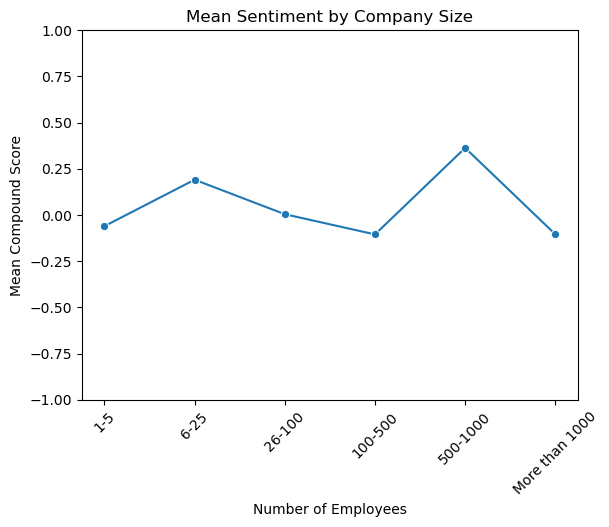

In [43]:

order = ["1-5","6-25","26-100","100-500","500-1000","More than 1000"]
df['no_employees'] = pd.Categorical(df['no_employees'], categories=order, ordered=True)

# Compute means
size_sentiment = df.groupby('no_employees')['vader_score'] \
                   .mean().reset_index()

sns.lineplot(
    data=size_sentiment,
    x='no_employees',
    y='vader_score',
    marker='o'
)
plt.title("Mean Sentiment by Company Size")
plt.xlabel("Number of Employees")
plt.ylabel("Mean Compound Score")
plt.xticks(rotation=45)
plt.ylim(-1,1)
plt.show()


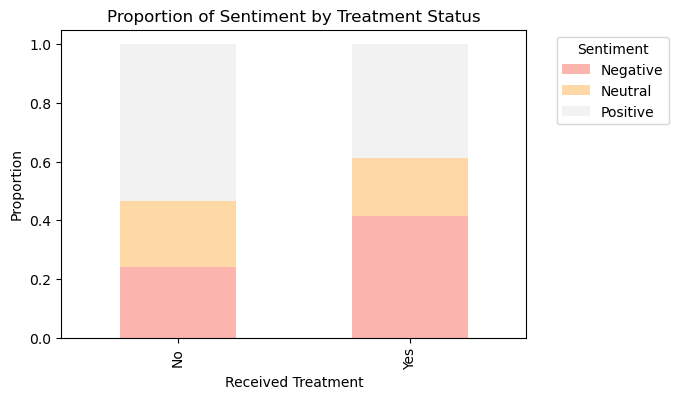

In [44]:
# Pivot table of counts
ct = pd.crosstab(
    index=df['treatment'],
    columns=df['sentiment'],
    normalize='index'  # to show proportions
)

ct.plot(
    kind='bar',
    stacked=True,
    colormap='Pastel1',
    figsize=(6,4)
)
plt.title("Proportion of Sentiment by Treatment Status")
plt.xlabel("Received Treatment")
plt.ylabel("Proportion")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1))
plt.show()


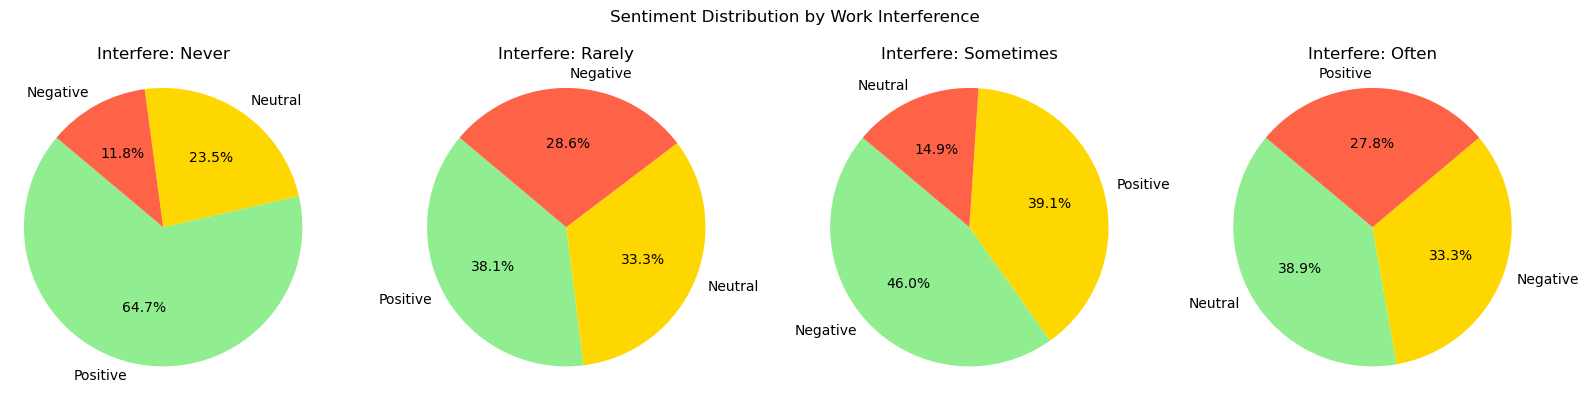

In [45]:

levels = df['work_interfere'].dropna().unique()
fig, axes = plt.subplots(1, len(levels), figsize=(4*len(levels), 4))

for ax, lvl in zip(axes, levels):
    counts = df[df['work_interfere'] == lvl]['sentiment'].value_counts()
    ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightgreen','gold','tomato']
    )
    ax.set_title(f"Interfere: {lvl}")
    ax.axis('equal')

plt.suptitle("Sentiment Distribution by Work Interference")
plt.tight_layout()
plt.show()
